In [80]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor 
import joblib 


In [81]:
df=pd.read_csv("dataset.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
missing_vales = df.isnull().sum().sort_values(ascending=False)
missing_vales

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

C:\Users\BAPS\AppData\Local\Temp\ipykernel_11536\3149588457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m_vales, y=m_vales.index, palette="viridis")


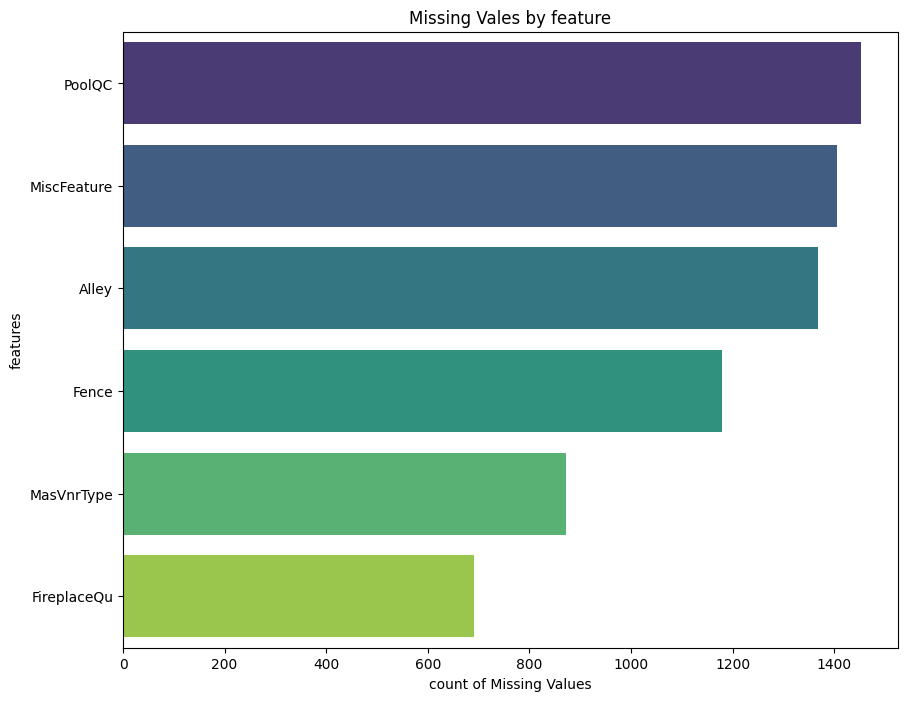

In [83]:
m_vales = missing_vales[missing_vales>500]
plt.figure(figsize=(10,8))
sns.barplot(x=m_vales, y=m_vales.index, palette="viridis")
plt.title("Missing Vales by feature")
plt.xlabel("count of Missing Values")
plt.ylabel("features")
plt.show() 

In [84]:
df = df.drop(columns=['Id','PoolQC','FireplaceQu','Fence','Alley','MiscFeature','MasVnrType'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [85]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [86]:
c_columns = df.select_dtypes(include=['object','category']).columns
print("categorical Columns: ")
print(c_columns)

categorical Columns: 
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [87]:
Label_encoder = LabelEncoder()
c_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

for col in c_columns:
    df[col] = Label_encoder.fit_transform(df[col])

    df



In [88]:
corr_matrix = df.corr()
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)
print("correlated Features", corr_with_price.head(20))

correlated Features SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64


In [89]:
c_features = corr_with_price[corr_with_price>0.25].index
df = df[c_features]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,706,2,65.0,0,854,61,1,8450,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1,978,1,80.0,298,0,0,0,9600,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,1,486,2,68.0,0,866,42,1,11250,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,1,216,0,60.0,0,756,35,0,9550,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,1,655,2,84.0,192,1053,84,1,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1,0,2,62.0,0,694,40,1,7917,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,2,790,1,85.0,349,0,0,0,13175,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,2,275,4,66.0,0,1152,60,0,9042,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,0,49,1,68.0,366,0,0,0,9717,1


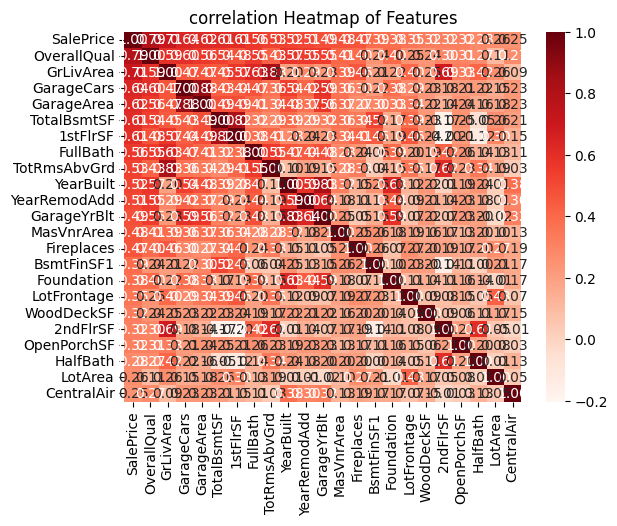

In [90]:
plt.Figure(figsize=(10,8))
sns.heatmap(df[corr_with_price[corr_with_price>0.25].index].corr(), annot=True, fmt='.2f', cmap='Reds')
plt.title("correlation Heatmap of Features")
plt.show()

In [91]:
df = df.drop(columns=['GarageCars','GarageYrBlt','TotRmsAbvGrd','Foundation','2ndFlrSF','HalfBath','TotalBsmtSF'])

In [92]:
df.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea,CentralAir
148,141000,7,1080,0,1080,1,2004,2005,120.0,0,680,63.0,0,0,7500,1
241,110500,5,866,0,866,1,1945,1997,0.0,0,329,40.0,58,42,3880,1
975,165000,7,1382,490,673,2,2000,2000,0.0,0,641,NaN,153,50,2651,1
1028,105000,5,1376,240,968,1,1941,1950,0.0,1,368,79.0,0,0,9492,1
1035,84000,4,845,290,845,1,1957,1957,0.0,0,0,NaN,186,0,11500,0


In [93]:
df.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageArea        0
1stFlrSF          0
FullBath          0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
OpenPorchSF       0
LotArea           0
CentralAir        0
dtype: int64

In [94]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [95]:
df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
LotArea         0
CentralAir      0
dtype: int64

In [96]:
x = df.drop('SalePrice' , axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [97]:
y





0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [98]:
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate = 0.01,
    max_depth = 6,
    n_estimators = 1000,
    subsample = 0.65,
    random_state = 42

)

model.fit(x_train, y_train)



,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [99]:
y_pred = model.predict(x_test)


In [100]:
mae  = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ", mae)

r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)

Mean Absolute Error:  18153.6875
R2 Score:  0.9002131819725037


In [101]:
joblib.dump(model,'xgb_model.jb')

['xgb_model.jb']